## Проверка гипотез

In [2]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats

warnings.filterwarnings('ignore')


df = pd.read_csv('dataset.csv')
df.head()

,Объем,Бренд,Цена со скидкой,Цена,Тип вина,Цвет,Сахар,Страна производителя,Регион,Аппелласьон,Производитель,Категория,Сорт винограда,Выдержка в ёмкости,Содержание алкоголя,Температура подачи,Friendly,BiO,Винтаж,Подарочная упаковка
0,0.75,Chateau Pinot,580.0,725.0,Тихое,Красное,Сухое,Россия,Краснодарский край,Кубань. Новороссийск ЗГУ,Chateau Pinot,ЗГУ,Пино нуарСаперави,Стальной чан,13.0,17.0,0,0,unknown,0
1,0.75,Bogarve 1915,1160.0,1450.0,Тихое,Красное,Сладкое,Испания,unknown,unknown,Bogarve 1915,unknown,Гарнача тинторера,Бочка,15.0,15.0,0,0,unknown,0
2,0.70,Olymp Winery,470.0,470.0,Тихое,Белое,Полусладкое,Россия,Краснодарский край,unknown,Olymp Winery,unknown,Мускат,unknown,11.0,11.0,0,0,unknown,0
3,0.75,Бурлюк,337.0,421.0,Тихое,Розовое,Полусухое,Россия,Крым,unknown,Бурлюк,unknown,РкацителиМолдова,Стальной чан,10.5,9.0,0,0,unknown,0
4,0.75,Felix Solis Avantis,954.0,1193.0,Тихое,Розовое,Полусухое,Испания,unknown,unknown,Felix Solis Avantis,unknown,ГарначаБобальТемпранильо,Стальной чан,13.0,9.0,0,0,unknown,0


In [14]:
df['Страна производителя'].value_counts()[:10]

Страна производителя
Италия       545
Франция      480
Россия       476
Испания      223
Чили         114
Грузия        98
Аргентина     67
Германия      64
ЮАР           59
США           52
Name: count, dtype: int64

In [16]:
rus = df.loc[df['Страна производителя'] == 'Россия', 'Цена']
france = df.loc[df['Страна производителя'] == 'Франция', 'Цена']

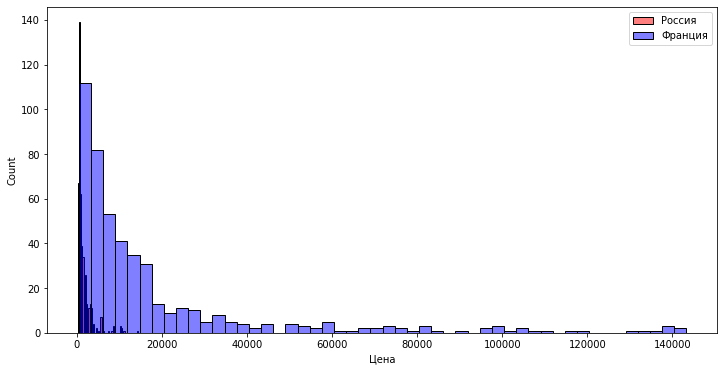

In [27]:
fig = plt.subplots(figsize=(12, 6))
sns.histplot(rus, color='red', alpha=0.5, bins=50, label='Россия')
sns.histplot(france[:476], color='blue', alpha=0.5, bins=50, label='Франция')
plt.legend()

plt.show()

Тут и так видно, что распределения сильно отличаются, но посмотрим на тест Уилкоксона, так как тут не нормальные распределения

In [36]:
stat, p_value = stats.wilcoxon(sorted(rus), sorted(france[:476]), alternative='less') # одинаковые размеры выборок требует

if p_value < 0.05:
    print('Гипотеза отвергается')
else:
    print('Гипотеза не отвергается')

Гипотеза отвергается


Видим, что нулевая гипотеза о равенстве отвергается, поэтому принимаем альтернативную, где цены на российские вина меньше, чем французские

In [28]:
italy = df.loc[df['Страна производителя'] == 'Италия', 'Цена']

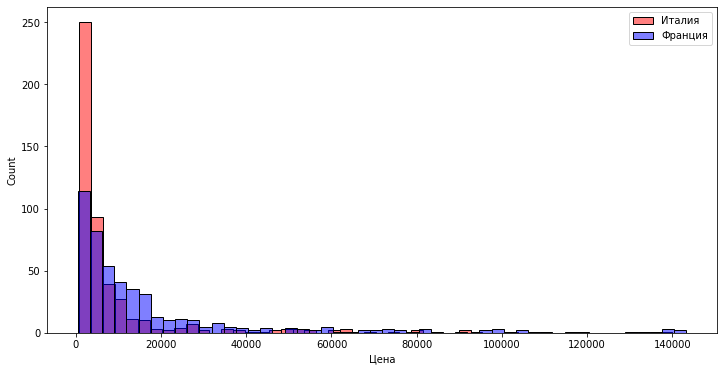

In [31]:
fig = plt.subplots(figsize=(12, 6))
sns.histplot(italy[:480], color='red', alpha=0.5, bins=50, label='Италия')
sns.histplot(france, color='blue', alpha=0.5, bins=50, label='Франция')
plt.legend()

plt.show()

In [41]:
stat, p_value = stats.wilcoxon(sorted(italy[:480]), sorted(france), alternative='less') # одинаковые размеры выборок требует

if p_value < 0.05:
    print('Гипотеза отвергается')
else:
    print('Гипотеза не отвергается')

Гипотеза отвергается


Здесь получилось так, что итальянские вина дешевле, чем французские. Но скорее всего дело в слишком длинном хвосте

In [42]:
df = df.loc[df['Цена'] < 30000]

In [43]:
rus = df.loc[df['Страна производителя'] == 'Россия', 'Цена']
france = df.loc[df['Страна производителя'] == 'Франция', 'Цена']
italy = df.loc[df['Страна производителя'] == 'Италия', 'Цена']

In [44]:
rus.shape, france.shape, italy.shape

((476,), (404,), (505,))

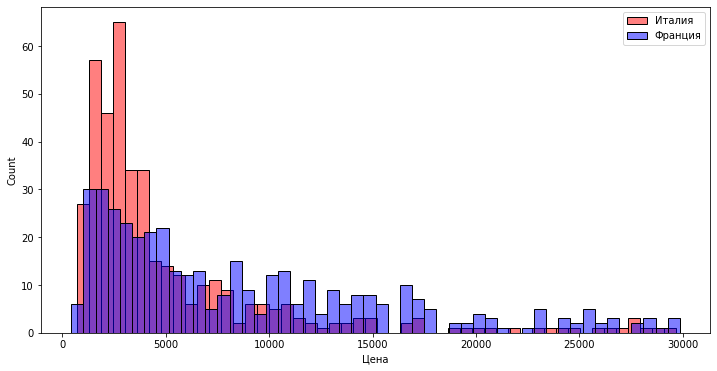

In [46]:
fig = plt.subplots(figsize=(12, 6))
sns.histplot(italy[:404], color='red', alpha=0.5, bins=50, label='Италия')
sns.histplot(france, color='blue', alpha=0.5, bins=50, label='Франция')
plt.legend()

plt.show()

In [45]:
stat, p_value = stats.wilcoxon(sorted(italy[:404]), sorted(france), alternative='less') # одинаковые размеры выборок требует

if p_value < 0.05:
    print('Гипотеза отвергается')
else:
    print('Гипотеза не отвергается')

Гипотеза отвергается


Без выбросов картина не поменялась, итальянские вина в основном дешевле, чем французские, можно сделать вывод, что страна производителя влияет на цену вина.

Проверим гипотезу о том, влияет ли ёмкость, в которой выдерживают вино, на цену

In [47]:
df['Выдержка в ёмкости'].unique()

array(['Стальной чан', 'Бочка', 'unknown', 'Цементная емкость', 'Квеври',
       'Бутылка', 'Амфора'], dtype=object)

In [48]:
steel_vat = df.loc[df['Выдержка в ёмкости'] == 'Стальной чан', 'Цена']
barrel = df.loc[df['Выдержка в ёмкости'] == 'Бочка', 'Цена']

In [50]:
steel_vat.shape, barrel.shape

((856,), (968,))

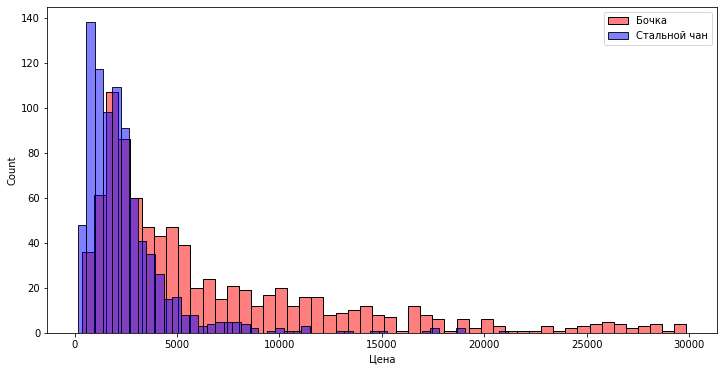

In [51]:
fig = plt.subplots(figsize=(12, 6))
sns.histplot(barrel[:856], color='red', alpha=0.5, bins=50, label='Бочка')
sns.histplot(steel_vat, color='blue', alpha=0.5, bins=50, label='Стальной чан')
plt.legend()

plt.show()

In [52]:
stat, p_value = stats.wilcoxon(sorted(barrel[:856]), sorted(steel_vat), alternative='less') # одинаковые размеры выборок требует

if p_value < 0.05:
    print('Гипотеза отвергается')
else:
    print('Гипотеза не отвергается')

Гипотеза не отвергается


Не принята альтернативная гипотеза о том, что вина, выдержанные в бочке, дешевле, следовательно они дороже :) И цена зависит от ёмкости стат. значимо.